In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [4]:
y_pred = model.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 1.0


Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Accuracy: 1.00


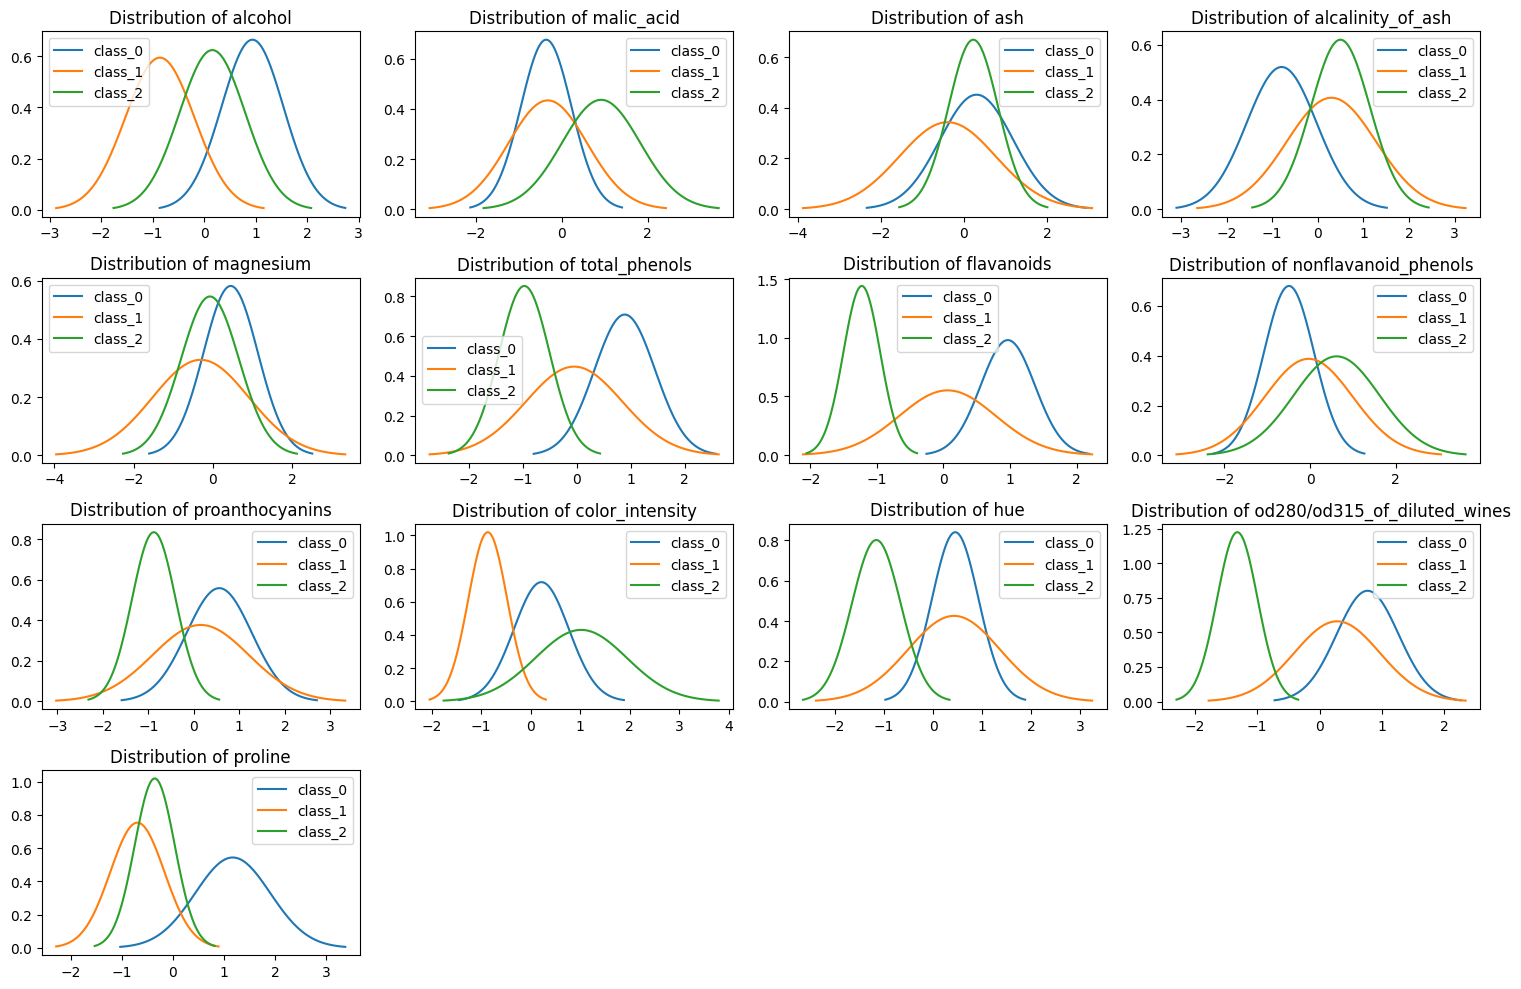

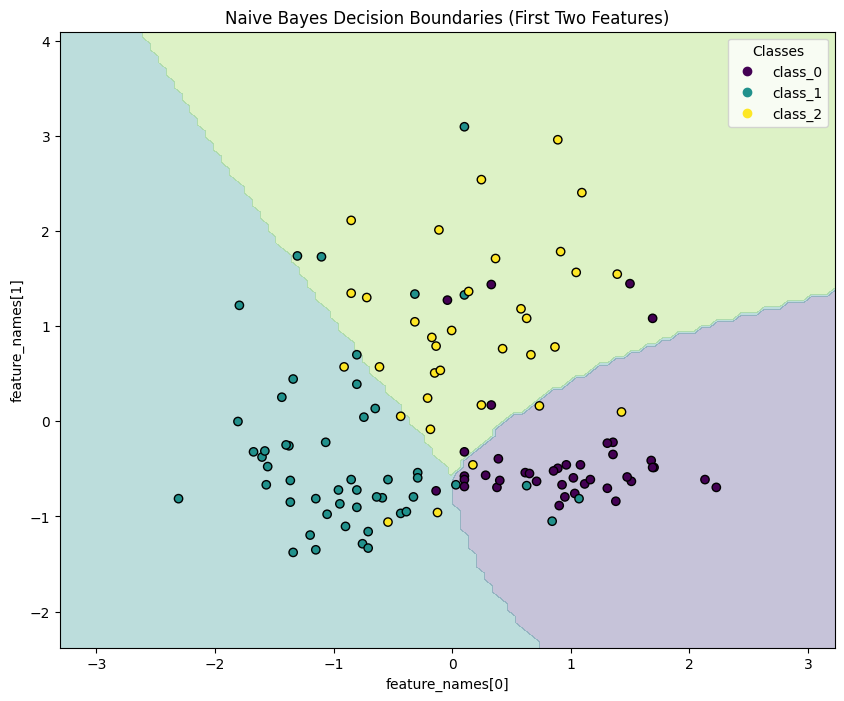

In [5]:
import numpy as np
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import norm
import matplotlib.pyplot as plt

class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_prior = {}
        self.feature_params = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for c in self.classes:
            X_c = X[y == c]
            self.class_prior[c] = len(X_c) / len(X)
            self.feature_params[c] = {
                'mean': np.mean(X_c, axis=0),
                'var': np.var(X_c, axis=0)
            }

    def _calculate_likelihood(self, X, mean, var):
        var = np.maximum(var, 1e-9)
        return norm.pdf(X, loc=mean, scale=np.sqrt(var))

    def predict(self, X):
        predictions = []
        for sample in X:
            posteriors = []
            for c in self.classes:
                posterior = np.log(self.class_prior[c])
                means = self.feature_params[c]['mean']
                vars = self.feature_params[c]['var']
                for i in range(len(sample)):
                    likelihood = self._calculate_likelihood(sample[i], means[i], vars[i])
                    posterior += np.log(likelihood)
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])
        return np.array(predictions)

# Load and preprocess the dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names
class_names = wine.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std

# Train and evaluate the model
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Plotting feature distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(4, 4, i + 1)
    for c in gnb.classes:
        mean = gnb.feature_params[c]['mean'][i]
        std = np.sqrt(gnb.feature_params[c]['var'][i])
        x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
        y = norm.pdf(x, loc=mean, scale=std)
        plt.plot(x, y, label=f'{class_names[c]}')
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

def plot_decision_boundaries():
  X_vis = X_train[:, :2]

  x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
  y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  z = gnb.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
  z = z.reshape(xx.shape)

  plt.figure(figsize=(10, 8))
  plt.contourf(xx, yy, z, alpha=0.3, levels = len(gnb.classes)-1)

  scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, cmap='viridis', edgecolor='k')
  uniqe_classes = np.unique(y_train)
  ledend_labels = [class_names[c] for c in uniqe_classes]
  plt.legend(handles=scatter.legend_elements()[0], labels=ledend_labels, title="Classes")

  plt.xlabel('feature_names[0]')
  plt.ylabel('feature_names[1]')
  plt.title('Naive Bayes Decision Boundaries (First Two Features)')
  plt.show()

plot_decision_boundaries()